In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 구글에서 제공하는 음성관련 라이브러리
# pip install gTTS

In [1]:
# c(도) d e f g a b(시)
# 4(4분음표), 8(8분음표)
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [3]:
from gtts import gTTS

In [35]:
texte = '이안씨 냄새나요 마늘냄새'
tts = gTTS(text = texte, lang='en')
tts.save('hi.mp3')

In [34]:
textk = '이안씨 냄새나요 마늘냄새'
tts = gTTS(text = textk, lang='ko')
tts.save('hiko.mp3')

In [16]:
ttsEn=gTTS(text=texte, lang='en')
ttsKr=gTTS(text=textk, lang='ko')

In [17]:
f = open('enkr.mp3', 'wb')
ttsEn.write_to_fp(f)
ttsEn.write_to_fp(f)
ttsKr.write_to_fp(f)
f.close()

In [32]:
# 
def seq2dataset(seq, windowSize) :
    dataset = []
    for i in range(len(seq)-windowSize) :
        subset = seq[i:i+windowSize+1]
        dataset.append([code2idx[item] for item in subset])
        
    return np.array(dataset)

In [150]:
#                  음계 4개씩 가져오겠다
dataset = seq2dataset(seq, windowSize=4)

In [151]:
xTrain = dataset[:, 0:4]  # [나 비 야 나], ..
yTrain = dataset[:, [4]]  # [비],
maxIdxValue = 13

In [152]:
# 정규화
xTrain = xTrain / maxIdxValue
xTrain

array([[0.84615385, 0.69230769, 0.15384615, 0.76923077],
       [0.69230769, 0.15384615, 0.76923077, 0.61538462],
       [0.15384615, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462, 0.07692308, 0.53846154],
       [0.61538462, 0.07692308, 0.53846154, 0.61538462],
       [0.07692308, 0.53846154, 0.61538462, 0.69230769],
       [0.53846154, 0.61538462, 0.69230769, 0.76923077],
       [0.61538462, 0.69230769, 0.76923077, 0.84615385],
       [0.69230769, 0.76923077, 0.84615385, 0.84615385],
       [0.76923077, 0.84615385, 0.84615385, 0.30769231],
       [0.84615385, 0.84615385, 0.30769231, 0.84615385],
       [0.84615385, 0.30769231, 0.84615385, 0.69230769],
       [0.30769231, 0.84615385, 0.69230769, 0.69230769],
       [0.84615385, 0.69230769, 0.69230769, 0.69230769],
       [0.69230769, 0.69230769, 0.69230769, 0.76923077],
       [0.69230769, 0.69230769, 0.76923077, 0.61538462],
       [0.69230769, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462,

In [153]:
from keras.utils import np_utils
yTrain = np_utils.to_categorical(yTrain)
yTrain.shape  # (50, 12)

oneHotVecSize = yTrain.shape[1]

In [154]:
import keras
from keras.layers import *
from keras.models import Sequential

In [155]:
# 모델 생성
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=4))
model.add(Dense(128, activation='relu'))
model.add(Dense(oneHotVecSize, activation='softmax'))

In [156]:
# 모델 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
# 콜백함수
class LossHistory(keras.callbacks.Callback) :
    def __init__(self) :
        self.losses = []
        print('확인')
        
    def onEpochEnd(self, batch, logs={}) :
        self.losses.append(logs.get('loss'))

In [158]:
history = LossHistory()
history.__init__()

확인
확인


In [159]:
# 
model.fit(xTrain, yTrain, epochs=2000, batch_size=10, callbacks=[history])

Epoch 1/2000
50/50 [==============================] - 0s 3ms/step - loss: 2.4986 - accuracy: 0.0200
Epoch 2/2000
50/50 [==============================] - 0s 140us/step - loss: 2.3911 - accuracy: 0.3200
Epoch 3/2000
50/50 [==============================] - 0s 120us/step - loss: 2.2969 - accuracy: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 160us/step - loss: 2.2029 - accuracy: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 161us/step - loss: 2.1213 - accuracy: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 140us/step - loss: 2.0504 - accuracy: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 160us/step - loss: 1.9874 - accuracy: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 140us/step - loss: 1.9379 - accuracy: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 140us/step - loss: 1.9080 - accuracy: 0.3400
Epoch 10/2000
50/50 [==============================] - 0s 120us/step - loss: 1.8853 

50/50 [==============================] - 0s 140us/step - loss: 1.4367 - accuracy: 0.5200
Epoch 81/2000
50/50 [==============================] - 0s 160us/step - loss: 1.4466 - accuracy: 0.5000
Epoch 82/2000
50/50 [==============================] - 0s 180us/step - loss: 1.4343 - accuracy: 0.5200
Epoch 83/2000
50/50 [==============================] - 0s 140us/step - loss: 1.4266 - accuracy: 0.5200
Epoch 84/2000
50/50 [==============================] - 0s 160us/step - loss: 1.4313 - accuracy: 0.5200
Epoch 85/2000
50/50 [==============================] - 0s 140us/step - loss: 1.4345 - accuracy: 0.5200
Epoch 86/2000
50/50 [==============================] - 0s 140us/step - loss: 1.4214 - accuracy: 0.4800
Epoch 87/2000
50/50 [==============================] - 0s 180us/step - loss: 1.4265 - accuracy: 0.4600
Epoch 88/2000
50/50 [==============================] - 0s 140us/step - loss: 1.4192 - accuracy: 0.5000
Epoch 89/2000
50/50 [==============================] - 0s 140us/step - loss: 1.4175 - a

50/50 [==============================] - 0s 140us/step - loss: 1.2655 - accuracy: 0.5400
Epoch 159/2000
50/50 [==============================] - 0s 160us/step - loss: 1.2619 - accuracy: 0.5000
Epoch 160/2000
50/50 [==============================] - 0s 140us/step - loss: 1.2689 - accuracy: 0.5000
Epoch 161/2000
50/50 [==============================] - 0s 140us/step - loss: 1.2626 - accuracy: 0.5000
Epoch 162/2000
50/50 [==============================] - 0s 160us/step - loss: 1.2677 - accuracy: 0.5200
Epoch 163/2000
50/50 [==============================] - 0s 160us/step - loss: 1.2623 - accuracy: 0.5600
Epoch 164/2000
50/50 [==============================] - 0s 180us/step - loss: 1.2601 - accuracy: 0.5400
Epoch 165/2000
50/50 [==============================] - 0s 140us/step - loss: 1.2522 - accuracy: 0.5000
Epoch 166/2000
50/50 [==============================] - 0s 120us/step - loss: 1.2578 - accuracy: 0.5000
Epoch 167/2000
50/50 [==============================] - 0s 160us/step - loss: 1

50/50 [==============================] - 0s 140us/step - loss: 1.1379 - accuracy: 0.6000
Epoch 237/2000
50/50 [==============================] - 0s 180us/step - loss: 1.1455 - accuracy: 0.5400
Epoch 238/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1336 - accuracy: 0.5400
Epoch 239/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1329 - accuracy: 0.5800
Epoch 240/2000
50/50 [==============================] - 0s 160us/step - loss: 1.1343 - accuracy: 0.6000
Epoch 241/2000
50/50 [==============================] - 0s 160us/step - loss: 1.1295 - accuracy: 0.6000
Epoch 242/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1292 - accuracy: 0.5800
Epoch 243/2000
50/50 [==============================] - 0s 140us/step - loss: 1.1304 - accuracy: 0.5400
Epoch 244/2000
50/50 [==============================] - 0s 180us/step - loss: 1.1360 - accuracy: 0.5400
Epoch 245/2000
50/50 [==============================] - 0s 160us/step - loss: 1

50/50 [==============================] - 0s 140us/step - loss: 1.0234 - accuracy: 0.5600
Epoch 315/2000
50/50 [==============================] - 0s 160us/step - loss: 1.0221 - accuracy: 0.5600
Epoch 316/2000
50/50 [==============================] - 0s 120us/step - loss: 1.0356 - accuracy: 0.5800
Epoch 317/2000
50/50 [==============================] - 0s 160us/step - loss: 1.0313 - accuracy: 0.5800
Epoch 318/2000
50/50 [==============================] - 0s 140us/step - loss: 1.0260 - accuracy: 0.5800
Epoch 319/2000
50/50 [==============================] - 0s 140us/step - loss: 1.0133 - accuracy: 0.6000
Epoch 320/2000
50/50 [==============================] - 0s 140us/step - loss: 1.0134 - accuracy: 0.5800
Epoch 321/2000
50/50 [==============================] - 0s 140us/step - loss: 1.0130 - accuracy: 0.5800
Epoch 322/2000
50/50 [==============================] - 0s 160us/step - loss: 1.0115 - accuracy: 0.6000
Epoch 323/2000
50/50 [==============================] - 0s 120us/step - loss: 1

50/50 [==============================] - 0s 160us/step - loss: 0.9259 - accuracy: 0.6000
Epoch 393/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9233 - accuracy: 0.5800
Epoch 394/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9196 - accuracy: 0.6200
Epoch 395/2000
50/50 [==============================] - 0s 160us/step - loss: 0.9226 - accuracy: 0.5800
Epoch 396/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9180 - accuracy: 0.6400
Epoch 397/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9107 - accuracy: 0.5800
Epoch 398/2000
50/50 [==============================] - 0s 140us/step - loss: 0.9173 - accuracy: 0.5600
Epoch 399/2000
50/50 [==============================] - 0s 160us/step - loss: 0.9223 - accuracy: 0.6200
Epoch 400/2000
50/50 [==============================] - 0s 180us/step - loss: 0.9189 - accuracy: 0.6200
Epoch 401/2000
50/50 [==============================] - 0s 160us/step - loss: 0

50/50 [==============================] - 0s 160us/step - loss: 0.8267 - accuracy: 0.6200
Epoch 471/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8252 - accuracy: 0.6600
Epoch 472/2000
50/50 [==============================] - 0s 160us/step - loss: 0.8244 - accuracy: 0.6400
Epoch 473/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8195 - accuracy: 0.6600
Epoch 474/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8252 - accuracy: 0.6400
Epoch 475/2000
50/50 [==============================] - 0s 160us/step - loss: 0.8176 - accuracy: 0.6800
Epoch 476/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8190 - accuracy: 0.6600
Epoch 477/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8144 - accuracy: 0.6400
Epoch 478/2000
50/50 [==============================] - 0s 140us/step - loss: 0.8182 - accuracy: 0.6800
Epoch 479/2000
50/50 [==============================] - 0s 120us/step - loss: 0

50/50 [==============================] - 0s 140us/step - loss: 0.7320 - accuracy: 0.7400
Epoch 549/2000
50/50 [==============================] - 0s 140us/step - loss: 0.7332 - accuracy: 0.7000
Epoch 550/2000
50/50 [==============================] - 0s 140us/step - loss: 0.7371 - accuracy: 0.7200
Epoch 551/2000
50/50 [==============================] - 0s 160us/step - loss: 0.7321 - accuracy: 0.6800
Epoch 552/2000
50/50 [==============================] - 0s 160us/step - loss: 0.7358 - accuracy: 0.7400
Epoch 553/2000
50/50 [==============================] - 0s 160us/step - loss: 0.7355 - accuracy: 0.7000
Epoch 554/2000
50/50 [==============================] - 0s 160us/step - loss: 0.7379 - accuracy: 0.6800
Epoch 555/2000
50/50 [==============================] - 0s 160us/step - loss: 0.7257 - accuracy: 0.7200
Epoch 556/2000
50/50 [==============================] - 0s 140us/step - loss: 0.7306 - accuracy: 0.7200
Epoch 557/2000
50/50 [==============================] - 0s 140us/step - loss: 0

50/50 [==============================] - 0s 140us/step - loss: 0.6539 - accuracy: 0.7600
Epoch 627/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6598 - accuracy: 0.7800
Epoch 628/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6620 - accuracy: 0.7600
Epoch 629/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6530 - accuracy: 0.7800
Epoch 630/2000
50/50 [==============================] - 0s 140us/step - loss: 0.6527 - accuracy: 0.7800
Epoch 631/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6480 - accuracy: 0.8000
Epoch 632/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6485 - accuracy: 0.8000
Epoch 633/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6491 - accuracy: 0.8000
Epoch 634/2000
50/50 [==============================] - 0s 160us/step - loss: 0.6427 - accuracy: 0.8200
Epoch 635/2000
50/50 [==============================] - 0s 140us/step - loss: 0

50/50 [==============================] - 0s 160us/step - loss: 0.5855 - accuracy: 0.8200
Epoch 705/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5814 - accuracy: 0.8400
Epoch 706/2000
50/50 [==============================] - 0s 160us/step - loss: 0.5857 - accuracy: 0.8600
Epoch 707/2000
50/50 [==============================] - 0s 180us/step - loss: 0.5757 - accuracy: 0.8400
Epoch 708/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5754 - accuracy: 0.8200
Epoch 709/2000
50/50 [==============================] - 0s 160us/step - loss: 0.5806 - accuracy: 0.8400
Epoch 710/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5788 - accuracy: 0.8400
Epoch 711/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5722 - accuracy: 0.8600
Epoch 712/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5763 - accuracy: 0.8400
Epoch 713/2000
50/50 [==============================] - 0s 160us/step - loss: 0

50/50 [==============================] - 0s 160us/step - loss: 0.5233 - accuracy: 0.8600
Epoch 783/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5130 - accuracy: 0.8600
Epoch 784/2000
50/50 [==============================] - 0s 180us/step - loss: 0.5202 - accuracy: 0.9000
Epoch 785/2000
50/50 [==============================] - 0s 160us/step - loss: 0.5073 - accuracy: 0.9000
Epoch 786/2000
50/50 [==============================] - 0s 160us/step - loss: 0.5136 - accuracy: 0.8600
Epoch 787/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5146 - accuracy: 0.8600
Epoch 788/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5073 - accuracy: 0.8800
Epoch 789/2000
50/50 [==============================] - 0s 160us/step - loss: 0.5150 - accuracy: 0.9000
Epoch 790/2000
50/50 [==============================] - 0s 140us/step - loss: 0.5301 - accuracy: 0.8800
Epoch 791/2000
50/50 [==============================] - 0s 140us/step - loss: 0

50/50 [==============================] - 0s 140us/step - loss: 0.4609 - accuracy: 0.9000
Epoch 861/2000
50/50 [==============================] - 0s 160us/step - loss: 0.4630 - accuracy: 0.9000
Epoch 862/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4617 - accuracy: 0.9000
Epoch 863/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4576 - accuracy: 0.9000
Epoch 864/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4625 - accuracy: 0.8600
Epoch 865/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4593 - accuracy: 0.9000
Epoch 866/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4663 - accuracy: 0.9000
Epoch 867/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4584 - accuracy: 0.9000
Epoch 868/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4486 - accuracy: 0.9000
Epoch 869/2000
50/50 [==============================] - 0s 140us/step - loss: 0

50/50 [==============================] - 0s 140us/step - loss: 0.4127 - accuracy: 0.9000
Epoch 939/2000
50/50 [==============================] - 0s 160us/step - loss: 0.4107 - accuracy: 0.9000
Epoch 940/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4137 - accuracy: 0.9000
Epoch 941/2000
50/50 [==============================] - 0s 160us/step - loss: 0.4127 - accuracy: 0.9000
Epoch 942/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4114 - accuracy: 0.9000
Epoch 943/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4093 - accuracy: 0.9000
Epoch 944/2000
50/50 [==============================] - 0s 120us/step - loss: 0.4092 - accuracy: 0.9000
Epoch 945/2000
50/50 [==============================] - 0s 160us/step - loss: 0.4216 - accuracy: 0.9000
Epoch 946/2000
50/50 [==============================] - 0s 140us/step - loss: 0.4187 - accuracy: 0.9000
Epoch 947/2000
50/50 [==============================] - 0s 140us/step - loss: 0

50/50 [==============================] - 0s 160us/step - loss: 0.3847 - accuracy: 0.9000
Epoch 1017/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3917 - accuracy: 0.9200
Epoch 1018/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3789 - accuracy: 0.9200
Epoch 1019/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3864 - accuracy: 0.9000
Epoch 1020/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3841 - accuracy: 0.9000
Epoch 1021/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3843 - accuracy: 0.9200
Epoch 1022/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3781 - accuracy: 0.8800
Epoch 1023/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3796 - accuracy: 0.8800
Epoch 1024/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3732 - accuracy: 0.9000
Epoch 1025/2000
50/50 [==============================] - 0s 140us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.3495 - accuracy: 0.8800
Epoch 1094/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3531 - accuracy: 0.8800
Epoch 1095/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3439 - accuracy: 0.9000
Epoch 1096/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3408 - accuracy: 0.9000
Epoch 1097/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3404 - accuracy: 0.9000
Epoch 1098/2000
50/50 [==============================] - 0s 180us/step - loss: 0.3394 - accuracy: 0.9200
Epoch 1099/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3413 - accuracy: 0.9200
Epoch 1100/2000
50/50 [==============================] - 0s 180us/step - loss: 0.3513 - accuracy: 0.9000
Epoch 1101/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3370 - accuracy: 0.9200
Epoch 1102/2000
50/50 [==============================] - 0s 200us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.3358 - accuracy: 0.9200
Epoch 1172/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3240 - accuracy: 0.9000
Epoch 1173/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3201 - accuracy: 0.9200
Epoch 1174/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3187 - accuracy: 0.9200
Epoch 1175/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3223 - accuracy: 0.9200
Epoch 1176/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3140 - accuracy: 0.9200
Epoch 1177/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3157 - accuracy: 0.9200
Epoch 1178/2000
50/50 [==============================] - 0s 120us/step - loss: 0.3153 - accuracy: 0.9200
Epoch 1179/2000
50/50 [==============================] - 0s 140us/step - loss: 0.3144 - accuracy: 0.9000
Epoch 1180/2000
50/50 [==============================] - 0s 160us/step 

50/50 [==============================] - 0s 180us/step - loss: 0.2882 - accuracy: 0.9000
Epoch 1249/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2933 - accuracy: 0.9000
Epoch 1250/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3056 - accuracy: 0.8800
Epoch 1251/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2908 - accuracy: 0.9200
Epoch 1252/2000
50/50 [==============================] - 0s 160us/step - loss: 0.3007 - accuracy: 0.9000
Epoch 1253/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2934 - accuracy: 0.8800
Epoch 1254/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2951 - accuracy: 0.9000
Epoch 1255/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2865 - accuracy: 0.9200
Epoch 1256/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2882 - accuracy: 0.9200
Epoch 1257/2000
50/50 [==============================] - 0s 160us/step 

50/50 [==============================] - 0s 160us/step - loss: 0.2691 - accuracy: 0.9200
Epoch 1326/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2668 - accuracy: 0.9200
Epoch 1327/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2799 - accuracy: 0.9000
Epoch 1328/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2914 - accuracy: 0.9000
Epoch 1329/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2697 - accuracy: 0.9200
Epoch 1330/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2698 - accuracy: 0.9000
Epoch 1331/2000
50/50 [==============================] - 0s 420us/step - loss: 0.2643 - accuracy: 0.9000
Epoch 1332/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2677 - accuracy: 0.9200
Epoch 1333/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2728 - accuracy: 0.9200
Epoch 1334/2000
50/50 [==============================] - 0s 200us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.2531 - accuracy: 0.9200
Epoch 1404/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2514 - accuracy: 0.9200
Epoch 1405/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2569 - accuracy: 0.9200
Epoch 1406/2000
50/50 [==============================] - 0s 200us/step - loss: 0.2488 - accuracy: 0.9200
Epoch 1407/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2524 - accuracy: 0.9200
Epoch 1408/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2574 - accuracy: 0.9000
Epoch 1409/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2591 - accuracy: 0.9000
Epoch 1410/2000
50/50 [==============================] - 0s 200us/step - loss: 0.2500 - accuracy: 0.9200
Epoch 1411/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2536 - accuracy: 0.9200
Epoch 1412/2000
50/50 [==============================] - 0s 200us/step 

50/50 [==============================] - 0s 160us/step - loss: 0.2387 - accuracy: 0.9200
Epoch 1481/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2393 - accuracy: 0.9000
Epoch 1482/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2399 - accuracy: 0.8800
Epoch 1483/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2417 - accuracy: 0.9200
Epoch 1484/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2377 - accuracy: 0.9000
Epoch 1485/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2404 - accuracy: 0.9200
Epoch 1486/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2493 - accuracy: 0.9200
Epoch 1487/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2384 - accuracy: 0.9200
Epoch 1488/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2499 - accuracy: 0.9000
Epoch 1489/2000
50/50 [==============================] - 0s 160us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.2232 - accuracy: 0.9200
Epoch 1559/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2257 - accuracy: 0.9200
Epoch 1560/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2223 - accuracy: 0.9200
Epoch 1561/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2270 - accuracy: 0.9200
Epoch 1562/2000
50/50 [==============================] - ETA: 0s - loss: 0.4366 - accuracy: 0.80 - 0s 160us/step - loss: 0.2328 - accuracy: 0.9000
Epoch 1563/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2339 - accuracy: 0.9200
Epoch 1564/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2259 - accuracy: 0.8800
Epoch 1565/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2233 - accuracy: 0.9000
Epoch 1566/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2279 - accuracy: 0.9200
Epoch 1567/2000
50/50 [======

50/50 [==============================] - 0s 180us/step - loss: 0.2194 - accuracy: 0.9200
Epoch 1636/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2370 - accuracy: 0.8800
Epoch 1637/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2145 - accuracy: 0.9200
Epoch 1638/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2130 - accuracy: 0.9200
Epoch 1639/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2127 - accuracy: 0.9200
Epoch 1640/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2143 - accuracy: 0.9200
Epoch 1641/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2289 - accuracy: 0.8800
Epoch 1642/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2124 - accuracy: 0.9000
Epoch 1643/2000
50/50 [==============================] - 0s 180us/step - loss: 0.2184 - accuracy: 0.9200
Epoch 1644/2000
50/50 [==============================] - 0s 160us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.2086 - accuracy: 0.9200
Epoch 1713/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2058 - accuracy: 0.8800
Epoch 1714/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2082 - accuracy: 0.9200
Epoch 1715/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1981 - accuracy: 0.9200
Epoch 1716/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1987 - accuracy: 0.9200
Epoch 1717/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2125 - accuracy: 0.8800
Epoch 1718/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2053 - accuracy: 0.9200
Epoch 1719/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2051 - accuracy: 0.9200
Epoch 1720/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2072 - accuracy: 0.9000
Epoch 1721/2000
50/50 [==============================] - 0s 160us/step 

50/50 [==============================] - 0s 140us/step - loss: 0.2038 - accuracy: 0.9200
Epoch 1791/2000
50/50 [==============================] - 0s 140us/step - loss: 0.2055 - accuracy: 0.9000
Epoch 1792/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1971 - accuracy: 0.9200
Epoch 1793/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1947 - accuracy: 0.9000
Epoch 1794/2000
50/50 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 1.00 - 0s 140us/step - loss: 0.1916 - accuracy: 0.9200
Epoch 1795/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1970 - accuracy: 0.9200
Epoch 1796/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1947 - accuracy: 0.9200
Epoch 1797/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1991 - accuracy: 0.9200
Epoch 1798/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1874 - accuracy: 0.9200
Epoch 1799/2000
50/50 [======

50/50 [==============================] - 0s 160us/step - loss: 0.2287 - accuracy: 0.9000
Epoch 1868/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2029 - accuracy: 0.9200
Epoch 1869/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1926 - accuracy: 0.9200
Epoch 1870/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1965 - accuracy: 0.9000
Epoch 1871/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1873 - accuracy: 0.9000
Epoch 1872/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1868 - accuracy: 0.9200
Epoch 1873/2000
50/50 [==============================] - 0s 160us/step - loss: 0.2022 - accuracy: 0.9200
Epoch 1874/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1928 - accuracy: 0.9200
Epoch 1875/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1907 - accuracy: 0.8800
Epoch 1876/2000
50/50 [==============================] - 0s 140us/step 

50/50 [==============================] - 0s 120us/step - loss: 0.2088 - accuracy: 0.9000
Epoch 1945/2000
50/50 [==============================] - 0s 200us/step - loss: 0.1790 - accuracy: 0.9400
Epoch 1946/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1937 - accuracy: 0.9200
Epoch 1947/2000
50/50 [==============================] - 0s 140us/step - loss: 0.1794 - accuracy: 0.9200
Epoch 1948/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1772 - accuracy: 0.9400
Epoch 1949/2000
50/50 [==============================] - 0s 120us/step - loss: 0.2031 - accuracy: 0.9000
Epoch 1950/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1893 - accuracy: 0.9000
Epoch 1951/2000
50/50 [==============================] - 0s 160us/step - loss: 0.1773 - accuracy: 0.9200
Epoch 1952/2000
50/50 [==============================] - 0s 120us/step - loss: 0.1860 - accuracy: 0.9200
Epoch 1953/2000
50/50 [==============================] - 0s 160us/step 

In [160]:
import matplotlib.pyplot as plt

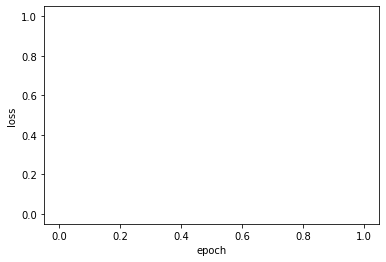

In [161]:
plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [162]:
scores = model.evaluate(xTrain, yTrain)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 1ms/step
accuracy : 92.00%


In [163]:
seqOut = ['g8','e8','e4','f8']
predOut = model.predict(xTrain)
predOut

array([[5.67164283e-14, 1.82464433e-28, 5.77614509e-28, 1.03373005e-11,
        2.88430449e-25, 1.18371046e-12, 8.72609819e-14, 2.55412815e-22,
        9.91908491e-01, 8.09143763e-03, 4.47646455e-30, 1.31992153e-10],
       [9.44682592e-13, 9.90674675e-01, 1.40523014e-03, 6.39270468e-08,
        5.79334092e-09, 3.16921446e-12, 2.23305871e-13, 1.33476850e-21,
        1.17791235e-04, 7.80112948e-03, 1.08558140e-06, 2.27650798e-12],
       [3.15997288e-17, 7.05134206e-24, 0.00000000e+00, 3.53528305e-29,
        0.00000000e+00, 5.09241396e-16, 1.53108119e-15, 9.99880075e-01,
        2.71030243e-24, 9.95588501e-09, 1.19869735e-04, 4.87709411e-18],
       [5.37755040e-12, 2.51621193e-21, 5.95752360e-21, 1.95249239e-08,
        1.69935272e-24, 1.42935275e-10, 2.94465429e-12, 1.74495680e-15,
        2.94685900e-01, 7.05314100e-01, 6.41418526e-27, 2.03858418e-14],
       [3.94861654e-09, 5.02267249e-05, 1.24201034e-14, 2.55952764e-04,
        7.68489272e-10, 2.27660149e-08, 2.74191181e-09, 3.26

In [164]:
predCount = 50
for i in range(predCount) :
    idx = np.argmax(predOut[i])
    seqOut.append(idx2code[idx])
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [165]:
from pygame import mixer

In [167]:
mixer.init()


In [168]:
# 곡 전체 예측
seqIn = ['g8','e8','e4','f8']
seqOut = seqIn

seqIn = [code2idx[it]/float(maxIdxValue) for it in seqIn ]

In [169]:
for i in range(predCount) :
    seqIn2 = np.array(seqIn)  # [0,13, .. ]
    seqIn2 = np.reshape(seqIn2, (1,4)) # 1:batchs
    predOut = model.predict(seqIn2)
    idx = np.argmax(predOut)
    
    seqOut.append(idx2code[idx])
    seqIn.append(idx/float(maxIdxValue))
    seqIn.pop(0)
    
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']


In [176]:
model = Sequential()
# LSTM (메모리셀개수, input_dim=입력속성수, input_length=시퀀스데이터입력길이, return_sequences=시퀀스출력여부)
# stateful : 상태유지모드
# 학습 샘플의 가장 마지막 상태가 다음 샘플을 학습할 때 입력으로 전달할 것인지 여부
model.add(LSTM(128, input_shape=[4,1]))  # 출력셀=128, 타임스탭=4, 속성개수=1

model.add(Dense(oneHotVecSize, activation='softmax'))

'''
keras에서 LSTM
타임스탭 : 샘플 1개에 포함 된 시퀀스 개수 (input length)
속성 : 입력되는 음표 1개당 index 1개 입력
상태유지모드(stateful) : 현재 샘플의 학습 상태가 다음 샘플의 초기 상태로 전달(True)
LSTM 셀 내부적으로 기억할 것은 기억하고, 버릴 것은 버리도록 하기위한 옵션
'''

'\nkeras에서 LSTM\ntime step : 샘플 1개에 포함 된 시퀀스 개수 (input length)\n속성 : 입력되는 음표 1개당 index 1개 입력\n'

In [177]:
xTrain.shape  # (샘플수, 타임스탭, 속성 수)로 변형
xTrain = np.reshape(xTrain, (50,4,1))
xTrain.shape

(50, 4, 1)

In [178]:
# 모델 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [180]:
# 
model.fit(xTrain, yTrain, epochs=2000, batch_size=10, callbacks=[history])

Epoch 1/20
50/50 [==============================] - 0s 7ms/step - loss: 2.4778 - accuracy: 0.1600
Epoch 2/20
50/50 [==============================] - 0s 380us/step - loss: 2.4341 - accuracy: 0.2400
Epoch 3/20
50/50 [==============================] - 0s 420us/step - loss: 2.3783 - accuracy: 0.3400
Epoch 4/20
50/50 [==============================] - 0s 400us/step - loss: 2.3181 - accuracy: 0.3400
Epoch 5/20
50/50 [==============================] - 0s 400us/step - loss: 2.2471 - accuracy: 0.3400
Epoch 6/20
50/50 [==============================] - 0s 420us/step - loss: 2.1512 - accuracy: 0.3400
Epoch 7/20
50/50 [==============================] - 0s 380us/step - loss: 2.0536 - accuracy: 0.3400
Epoch 8/20
50/50 [==============================] - 0s 460us/step - loss: 1.9956 - accuracy: 0.3400
Epoch 9/20
50/50 [==============================] - 0s 400us/step - loss: 1.9659 - accuracy: 0.3400
Epoch 10/20
50/50 [==============================] - 0s 460us/step - loss: 1.9471 - accuracy: 0.3400
E

In [181]:
scores = model.evaluate(xTrain, yTrain)
print('%s : %.2f%%' % (model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/step
accuracy : 34.00%


In [199]:
# stateful 적용
model = Sequential()
# LSTM (메모리셀개수, input_dim=입력속성수, input_length=시퀀스데이터입력길이, return_sequences=시퀀스출력여부)
# stateful : 상태유지모드
# 학습 샘플의 가장 마지막 상태가 다음 샘플을 학습할 때 입력으로 전달할 것인지 여부
model.add(LSTM(128, batch_input_shape=[1,4,1], stateful=True))  # 출력셀=128, 타임스탭=4, 속성개수=1
'''
상태초기화가 필요한 경우
- 한 에폭 안에서 여러 개의 시퀀스 데이터가 있을 때, 새로운 시퀀스 데이터를 학습하기 전에 상태 초기화
 - 마지막 샘플 학습을 마치고나서, 새로운 에폭이 실행될 때 새로운 샘플 학습을 해야함.
'''
model.add(Dense(oneHotVecSize, activation='softmax'))

In [200]:
# 모델 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [201]:
# 
numEpochs = 2000
for i in range(numEpochs) :
    print('에폭 : {}'.format(str(i)))
    model.fit(xTrain, yTrain, epochs=1, batch_size=1, callbacks=[history], shuffle=False)
    model.reset_states()

에폭 : 0
Epoch 1/1
50/50 [==============================] - 0s 8ms/step - loss: 2.3767 - accuracy: 0.2000
에폭 : 1
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9985 - accuracy: 0.3400
에폭 : 2
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9582 - accuracy: 0.3400
에폭 : 3
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9434 - accuracy: 0.3400
에폭 : 4
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9345 - accuracy: 0.3400
에폭 : 5
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9279 - accuracy: 0.3400
에폭 : 6
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9226 - accuracy: 0.3400
에폭 : 7
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9180 - accuracy: 0.3400
에폭 : 8
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9139 - accuracy: 0.3600
에폭 : 9
Epoch 1/1
50/50 [==============================] - 0s 2ms

50/50 [==============================] - 0s 2ms/step - loss: 1.4106 - accuracy: 0.5200
에폭 : 78
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.2323 - accuracy: 0.5200
에폭 : 79
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1458 - accuracy: 0.5600
에폭 : 80
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1322 - accuracy: 0.5800
에폭 : 81
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.2681 - accuracy: 0.5600
에폭 : 82
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1145 - accuracy: 0.5800
에폭 : 83
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.4432 - accuracy: 0.4600
에폭 : 84
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.2759 - accuracy: 0.4800
에폭 : 85
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.6000
에폭 : 86
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - 

50/50 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8600
에폭 : 155
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8800
에폭 : 156
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.9000
에폭 : 157
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8000
에폭 : 158
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2844 - accuracy: 0.9200
에폭 : 159
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.9800
에폭 : 160
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.9295 - accuracy: 0.6400
에폭 : 161
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.9341 - accuracy: 0.6600
에폭 : 162
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.8000
에폭 : 163
Epoch 1/1
50/50 [==============================] - 0s 2m

50/50 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
에폭 : 232
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
에폭 : 233
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.7060e-04 - accuracy: 1.0000
에폭 : 234
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.3606e-04 - accuracy: 1.0000
에폭 : 235
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.0292e-04 - accuracy: 1.0000
에폭 : 236
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.7115e-04 - accuracy: 1.0000
에폭 : 237
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.4068e-04 - accuracy: 1.0000
에폭 : 238
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.1157e-04 - accuracy: 1.0000
에폭 : 239
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 7.8396e-04 - accuracy: 1.0000
에폭 : 240
Epoch 1/1
50/50 [===========

50/50 [==============================] - 0s 2ms/step - loss: 1.1591 - accuracy: 0.6400
에폭 : 307
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1183 - accuracy: 0.6400
에폭 : 308
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.8600
에폭 : 309
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.8600
에폭 : 310
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.8600
에폭 : 311
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.9200
에폭 : 312
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.9200
에폭 : 313
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 0.9800
에폭 : 314
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.1421 - accuracy: 1.0000
에폭 : 315
Epoch 1/1
50/50 [==============================] - 0s 3m

50/50 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000
에폭 : 384
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000
에폭 : 385
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
에폭 : 386
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
에폭 : 387
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
에폭 : 388
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
에폭 : 389
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
에폭 : 390
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
에폭 : 391
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
에폭 : 392
Epoch 1/1
50/50 [==============================] - 0s 2m

50/50 [==============================] - 0s 3ms/step - loss: 1.5799e-04 - accuracy: 1.0000
에폭 : 459
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.5393e-04 - accuracy: 1.0000
에폭 : 460
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.4994e-04 - accuracy: 1.0000
에폭 : 461
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.4609e-04 - accuracy: 1.0000
에폭 : 462
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.4227e-04 - accuracy: 1.0000
에폭 : 463
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.3860e-04 - accuracy: 1.0000
에폭 : 464
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.3499e-04 - accuracy: 1.0000
에폭 : 465
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.3150e-04 - accuracy: 1.0000
에폭 : 466
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.2810e-04 - accuracy: 1.0000
에폭 : 467
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 2ms/step - loss: 2.2566e-05 - accuracy: 1.0000
에폭 : 533
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.1984e-05 - accuracy: 1.0000
에폭 : 534
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 2.1402e-05 - accuracy: 1.0000
에폭 : 535
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.0854e-05 - accuracy: 1.0000
에폭 : 536
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.0325e-05 - accuracy: 1.0000
에폭 : 537
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9800e-05 - accuracy: 1.0000
에폭 : 538
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9269e-05 - accuracy: 1.0000
에폭 : 539
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.8809e-05 - accuracy: 1.0000
에폭 : 540
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.8294e-05 - accuracy: 1.0000
에폭 : 541
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 2ms/step - loss: 3.1996e-06 - accuracy: 1.0000
에폭 : 606
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 3.2639e-06 - accuracy: 1.0000
에폭 : 607
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 3.0303e-06 - accuracy: 1.0000
에폭 : 608
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 3.1280e-06 - accuracy: 1.0000
에폭 : 609
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.8539e-06 - accuracy: 1.0000
에폭 : 610
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.9683e-06 - accuracy: 1.0000
에폭 : 611
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.6989e-06 - accuracy: 1.0000
에폭 : 612
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.8014e-06 - accuracy: 1.0000
에폭 : 613
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.5606e-06 - accuracy: 1.0000
에폭 : 614
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 2ms/step - loss: 4.4823e-07 - accuracy: 1.0000
에폭 : 680
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.6730e-07 - accuracy: 1.0000
에폭 : 681
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.1962e-07 - accuracy: 1.0000
에폭 : 682
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.3631e-07 - accuracy: 1.0000
에폭 : 683
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.0770e-07 - accuracy: 1.0000
에폭 : 684
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.3154e-07 - accuracy: 1.0000
에폭 : 685
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 3.8862e-07 - accuracy: 1.0000: 0s - loss: 4.0427e-07 - accuracy: 1.
에폭 : 686
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 4.1962e-07 - accuracy: 1.0000
에폭 : 687
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 3.6955e-07 - accuracy

50/50 [==============================] - 0s 2ms/step - loss: 0.7987 - accuracy: 0.6600
에폭 : 755
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.8704 - accuracy: 0.6800
에폭 : 756
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.7000
에폭 : 757
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7800
에폭 : 758
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.9000
에폭 : 759
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8600
에폭 : 760
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.9636 - accuracy: 0.5800
에폭 : 761
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.6800
에폭 : 762
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.7600
에폭 : 763
Epoch 1/1
50/50 [==============================] - 0s 2m

50/50 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
에폭 : 832
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
에폭 : 833
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
에폭 : 834
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
에폭 : 835
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000
에폭 : 836
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
에폭 : 837
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
에폭 : 838
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
에폭 : 839
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
에폭 : 840
Epoch 1/1
50/50 [==============================] - 0s 2m

50/50 [==============================] - 0s 3ms/step - loss: 2.3258e-04 - accuracy: 1.0000
에폭 : 907
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 2.2354e-04 - accuracy: 1.0000
에폭 : 908
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.1550e-04 - accuracy: 1.0000
에폭 : 909
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.0831e-04 - accuracy: 1.0000
에폭 : 910
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 2.0158e-04 - accuracy: 1.0000
에폭 : 911
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9493e-04 - accuracy: 1.0000
에폭 : 912
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.8820e-04 - accuracy: 1.0000
에폭 : 913
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.8149e-04 - accuracy: 1.0000
에폭 : 914
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.7490e-04 - accuracy: 1.0000
에폭 : 915
Epoch 1/1
50/50 [===

50/50 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9600
에폭 : 983
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.8600
에폭 : 984
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9400
에폭 : 985
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9800
에폭 : 986
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2663 - accuracy: 0.8800
에폭 : 987
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9200
에폭 : 988
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.9218 - accuracy: 0.5600
에폭 : 989
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0144 - accuracy: 0.7000
에폭 : 990
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9600
에폭 : 991
Epoch 1/1
50/50 [==============================] - 0s 2m

50/50 [==============================] - 0s 2ms/step - loss: 9.6977e-04 - accuracy: 1.0000
에폭 : 1059
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.3870e-04 - accuracy: 1.0000
에폭 : 1060
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.0944e-04 - accuracy: 1.0000
에폭 : 1061
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.8183e-04 - accuracy: 1.0000
에폭 : 1062
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.5569e-04 - accuracy: 1.0000
에폭 : 1063
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.3077e-04 - accuracy: 1.0000
에폭 : 1064
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.0673e-04 - accuracy: 1.0000
에폭 : 1065
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 7.8260e-04 - accuracy: 1.0000
에폭 : 1066
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 7.5224e-04 - accuracy: 1.0000
에폭 : 1067
Epoch 1/1
5

50/50 [==============================] - 0s 2ms/step - loss: 1.1765e-04 - accuracy: 1.0000
에폭 : 1132
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1461e-04 - accuracy: 1.0000
에폭 : 1133
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1167e-04 - accuracy: 1.0000
에폭 : 1134
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0883e-04 - accuracy: 1.0000
에폭 : 1135
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0609e-04 - accuracy: 1.0000
에폭 : 1136
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0347e-04 - accuracy: 1.0000
에폭 : 1137
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0088e-04 - accuracy: 1.0000
에폭 : 1138
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.8397e-05 - accuracy: 1.0000
에폭 : 1139
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.5961e-05 - accuracy: 1.0000
에폭 : 1140
Epoch 1/1
5

50/50 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 1.0000
에폭 : 1206
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 1.0000
에폭 : 1207
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 1.0000
에폭 : 1208
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 1.0000
에폭 : 1209
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 1.0000
에폭 : 1210
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
에폭 : 1211
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 1.0000
에폭 : 1212
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 1.0000
에폭 : 1213
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9600
에폭 : 1214
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 2ms/step - loss: 9.9870e-04 - accuracy: 1.0000
에폭 : 1282
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.6718e-04 - accuracy: 1.0000
에폭 : 1283
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.3698e-04 - accuracy: 1.0000
에폭 : 1284
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.0823e-04 - accuracy: 1.0000
에폭 : 1285
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.8150e-04 - accuracy: 1.0000
에폭 : 1286
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.5727e-04 - accuracy: 1.0000
에폭 : 1287
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 8.2965e-04 - accuracy: 1.0000
에폭 : 1288
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.0784e-04 - accuracy: 1.0000
에폭 : 1289
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 7.8157e-04 - accuracy: 1.0000
에폭 : 1290
Epoch 1/1
5

에폭 : 1355
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1418e-04 - accuracy: 1.0000
에폭 : 1356
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.1078e-04 - accuracy: 1.0000
에폭 : 1357
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0749e-04 - accuracy: 1.0000
에폭 : 1358
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0433e-04 - accuracy: 1.0000
에폭 : 1359
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.0125e-04 - accuracy: 1.0000
에폭 : 1360
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.8289e-05 - accuracy: 1.0000
에폭 : 1361
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.5383e-05 - accuracy: 1.0000
에폭 : 1362
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.2565e-05 - accuracy: 1.0000
에폭 : 1363
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 8.9826e-05 - accuracy: 1.0000
에

50/50 [==============================] - 0s 2ms/step - loss: 1.5030e-05 - accuracy: 1.0000
에폭 : 1429
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.4648e-05 - accuracy: 1.0000
에폭 : 1430
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.4274e-05 - accuracy: 1.0000
에폭 : 1431
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.3904e-05 - accuracy: 1.0000
에폭 : 1432
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.3530e-05 - accuracy: 1.0000
에폭 : 1433
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.3182e-05 - accuracy: 1.0000
에폭 : 1434
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.2829e-05 - accuracy: 1.0000
에폭 : 1435
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.2491e-05 - accuracy: 1.0000
에폭 : 1436
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.2150e-05 - accuracy: 1.0000
에폭 : 1437
Epoch 1/1
5

에폭 : 1502
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 1.8978e-06 - accuracy: 1.0000
에폭 : 1503
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.8549e-06 - accuracy: 1.0000
에폭 : 1504
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.8120e-06 - accuracy: 1.0000
에폭 : 1505
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.7762e-06 - accuracy: 1.0000
에폭 : 1506
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.7238e-06 - accuracy: 1.0000
에폭 : 1507
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.6975e-06 - accuracy: 1.0000
에폭 : 1508
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.6475e-06 - accuracy: 1.0000
에폭 : 1509
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.6093e-06 - accuracy: 1.0000
에폭 : 1510
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.5450e-06 - accuracy: 1.0000
에

50/50 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9800
에폭 : 1577
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 1.0000
에폭 : 1578
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 1.0000
에폭 : 1579
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 1.0000
에폭 : 1580
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 1.0000
에폭 : 1581
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 1.0000
에폭 : 1582
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 1.0000
에폭 : 1583
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 1.0000
에폭 : 1584
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 1.0000
에폭 : 1585
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
에폭 : 1652
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
에폭 : 1653
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
에폭 : 1654
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
에폭 : 1655
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
에폭 : 1656
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
에폭 : 1657
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
에폭 : 1658
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.9611e-04 - accuracy: 1.0000
에폭 : 1659
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 9.7005e-04 - accuracy: 1.0000
에폭 : 1660
Epoch 1/1
50/50 [======================

50/50 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
에폭 : 1728
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
에폭 : 1729
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
에폭 : 1730
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
에폭 : 1731
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000
에폭 : 1732
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
에폭 : 1733
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000
에폭 : 1734
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 1.2352 - accuracy: 0.6800
에폭 : 1735
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 0.9073 - accuracy: 0.6000
에폭 : 1736
Epoch 1/1
50/50 [==============================

50/50 [==============================] - 0s 2ms/step - loss: 5.7995e-04 - accuracy: 1.0000
에폭 : 1803
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 5.5947e-04 - accuracy: 1.0000
에폭 : 1804
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 5.4007e-04 - accuracy: 1.0000
에폭 : 1805
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 5.2164e-04 - accuracy: 1.0000
에폭 : 1806
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 5.0407e-04 - accuracy: 1.0000
에폭 : 1807
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.8733e-04 - accuracy: 1.0000
에폭 : 1808
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.7131e-04 - accuracy: 1.0000
에폭 : 1809
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.5590e-04 - accuracy: 1.0000
에폭 : 1810
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 4.4103e-04 - accuracy: 1.0000
에폭 : 1811
Epoch 1/1
5

에폭 : 1876
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 6.1925e-05 - accuracy: 1.0000
에폭 : 1877
Epoch 1/1
50/50 [==============================] - 0s 4ms/step - loss: 6.0352e-05 - accuracy: 1.0000
에폭 : 1878
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.8843e-05 - accuracy: 1.0000
에폭 : 1879
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.7365e-05 - accuracy: 1.0000
에폭 : 1880
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.5870e-05 - accuracy: 1.0000
에폭 : 1881
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.4411e-05 - accuracy: 1.0000
에폭 : 1882
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.2950e-05 - accuracy: 1.0000
에폭 : 1883
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.1496e-05 - accuracy: 1.0000
에폭 : 1884
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 5.0037e-05 - accuracy: 1.0000
에

50/50 [==============================] - 0s 2ms/step - loss: 7.6794e-06 - accuracy: 1.0000
에폭 : 1950
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 7.4839e-06 - accuracy: 1.0000
에폭 : 1951
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 7.2860e-06 - accuracy: 1.0000
에폭 : 1952
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 7.1358e-06 - accuracy: 1.0000
에폭 : 1953
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 6.9356e-06 - accuracy: 1.0000
에폭 : 1954
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 6.7734e-06 - accuracy: 1.0000
에폭 : 1955
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 6.6113e-06 - accuracy: 1.0000
에폭 : 1956
Epoch 1/1
50/50 [==============================] - 0s 3ms/step - loss: 6.4301e-06 - accuracy: 1.0000
에폭 : 1957
Epoch 1/1
50/50 [==============================] - 0s 2ms/step - loss: 6.2608e-06 - accuracy: 1.0000
에폭 : 1958
Epoch 1/1
5

In [202]:
model.evaluate(xTrain, yTrain, batch_size=1)

50/50 [==============================] - 0s 4ms/step


[2.2220572765263568e-06, 1.0]